# **Milestone2: Journey from Raw Data to Insights (Data Visualization)**

<u>Dataset: Health Trends</u>

By: **Eva** (Computer Science), **Lihan** (Data Science), **Sean** (Psychology), & **Vickie** (Urban & Environmental Studies)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import regex as re
from scipy import stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# **Section 1: A Comprehensive Introduction**

In this section, we would like to:


1.   First, recap the dataset's information and our previous works on data cleaning;
2.   Second, describe the hypothesis and relevant and informative features of the dataset, and hence, elucidate the overall workflow of this Colab notebook.

## **1.1 Recap of the Dataset's Info & Previous Data Cleaning**


We would like to begin with **what the dataset originally contains**.

The “Health Trends” is a robust dataset, containing several sub-datasets. We use two of them:




(1)    “Health Statistics” contains the **prevalence rates** for **obesity and exercise** across the United States, from the years 2004 to 2018, with stratification as **overall** (i.e., all population) and **gender** (i.e., female vs. male).

*   The **variables of interest** are the **obesity and exercise rates** for the overall population, females, and males, demonstrated by the “Sub-Dataset 1” in the figure below.  

*   Note that: (for a representative sample) Prevalence is the number of people in the sample with the characteristic of interest, divided by the total number of people in the sample.



(2)   “Spatial Search Intensity” contains the **search quantity in Google** for 81 specific keywords across the United States, from the years 2004 to 2018. Note that there are data only for the overall population, without stratifications like gender.

*   In the data cleaning stage, we selected a total of 26 words (13 each) for obesity and exercise, respectively, and summed up all the searches in a given year, so as to compute the **obesity and exercise search** for the overall population, which is our **variable of interest**, demonstrated by the “Sub-Dataset 2” in the figure below.


*   We employed a criteria grounded in cognitive psychology in keyword selection, focusing on perceptual salience and semantic priming.

 *   For obesity, 13 keywords pertaining to food and dressing were chosen for their heightened perceptual salience, as these terms are more likely to be noticed and recognized due to their direct relevance to obesity-related behaviors and self-perception.
 *   Similarly, for exercise, 13 keywords related to physical exercise and workout were selected, leveraging semantic priming, where these terms are more likely to trigger associated thoughts and behaviors related to exercise, thereby ensuring their relevance and impact in the context of fitness and health.




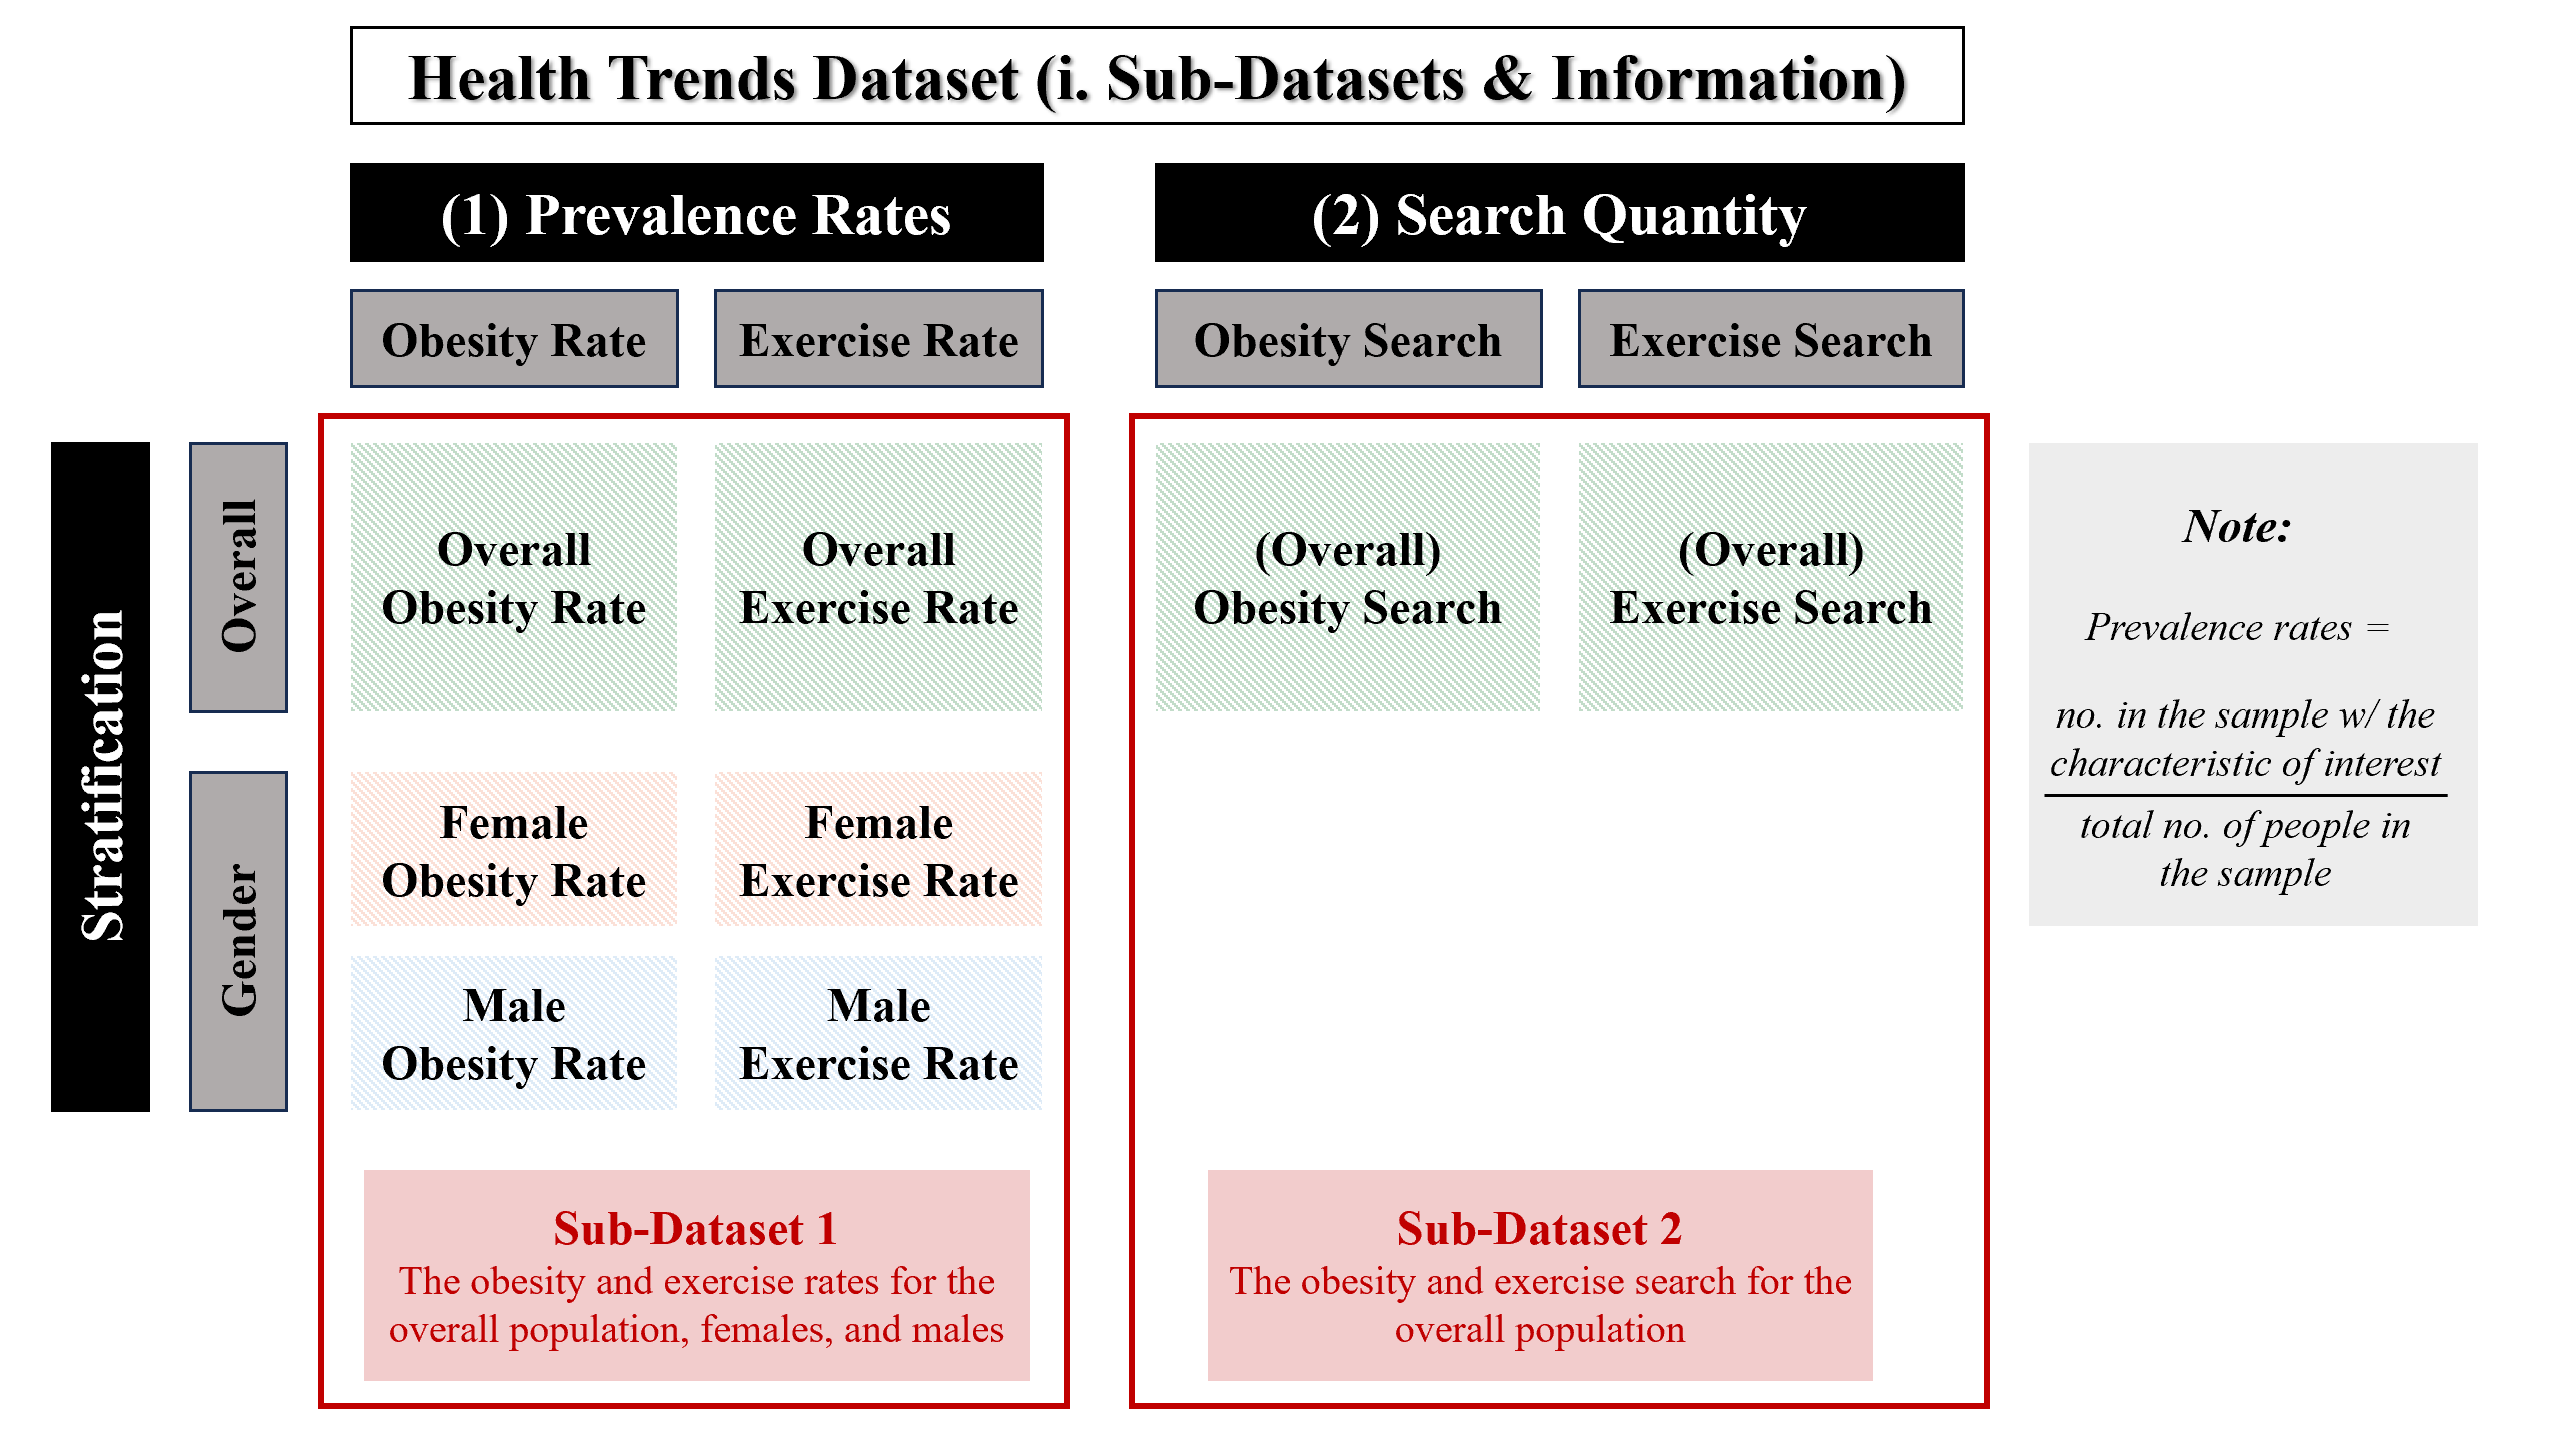

Then, we would like to describe the **DataFrames used in the analysis**.

After the data cleaning (done by Milestone 1), we could obtain three datasets, namely:  

*   health_obesity_gender
*   health_obesity_gender
*   merged_df

While these names are self-explanatory, we attach a graph below, illustrating the relationship between the three DataFrames. The code below prints the corresponding data. We have also attached the code for data cleaning in the **Appendix**; please refer to them if you need to.


Note that: since the data are skewed given the wide timespan of 15 years and across different states, all the data files were transformed via **mean normalization** (subtract the mean for every data point, and then divide by the range) to reduce the skewness and improve interpretability.


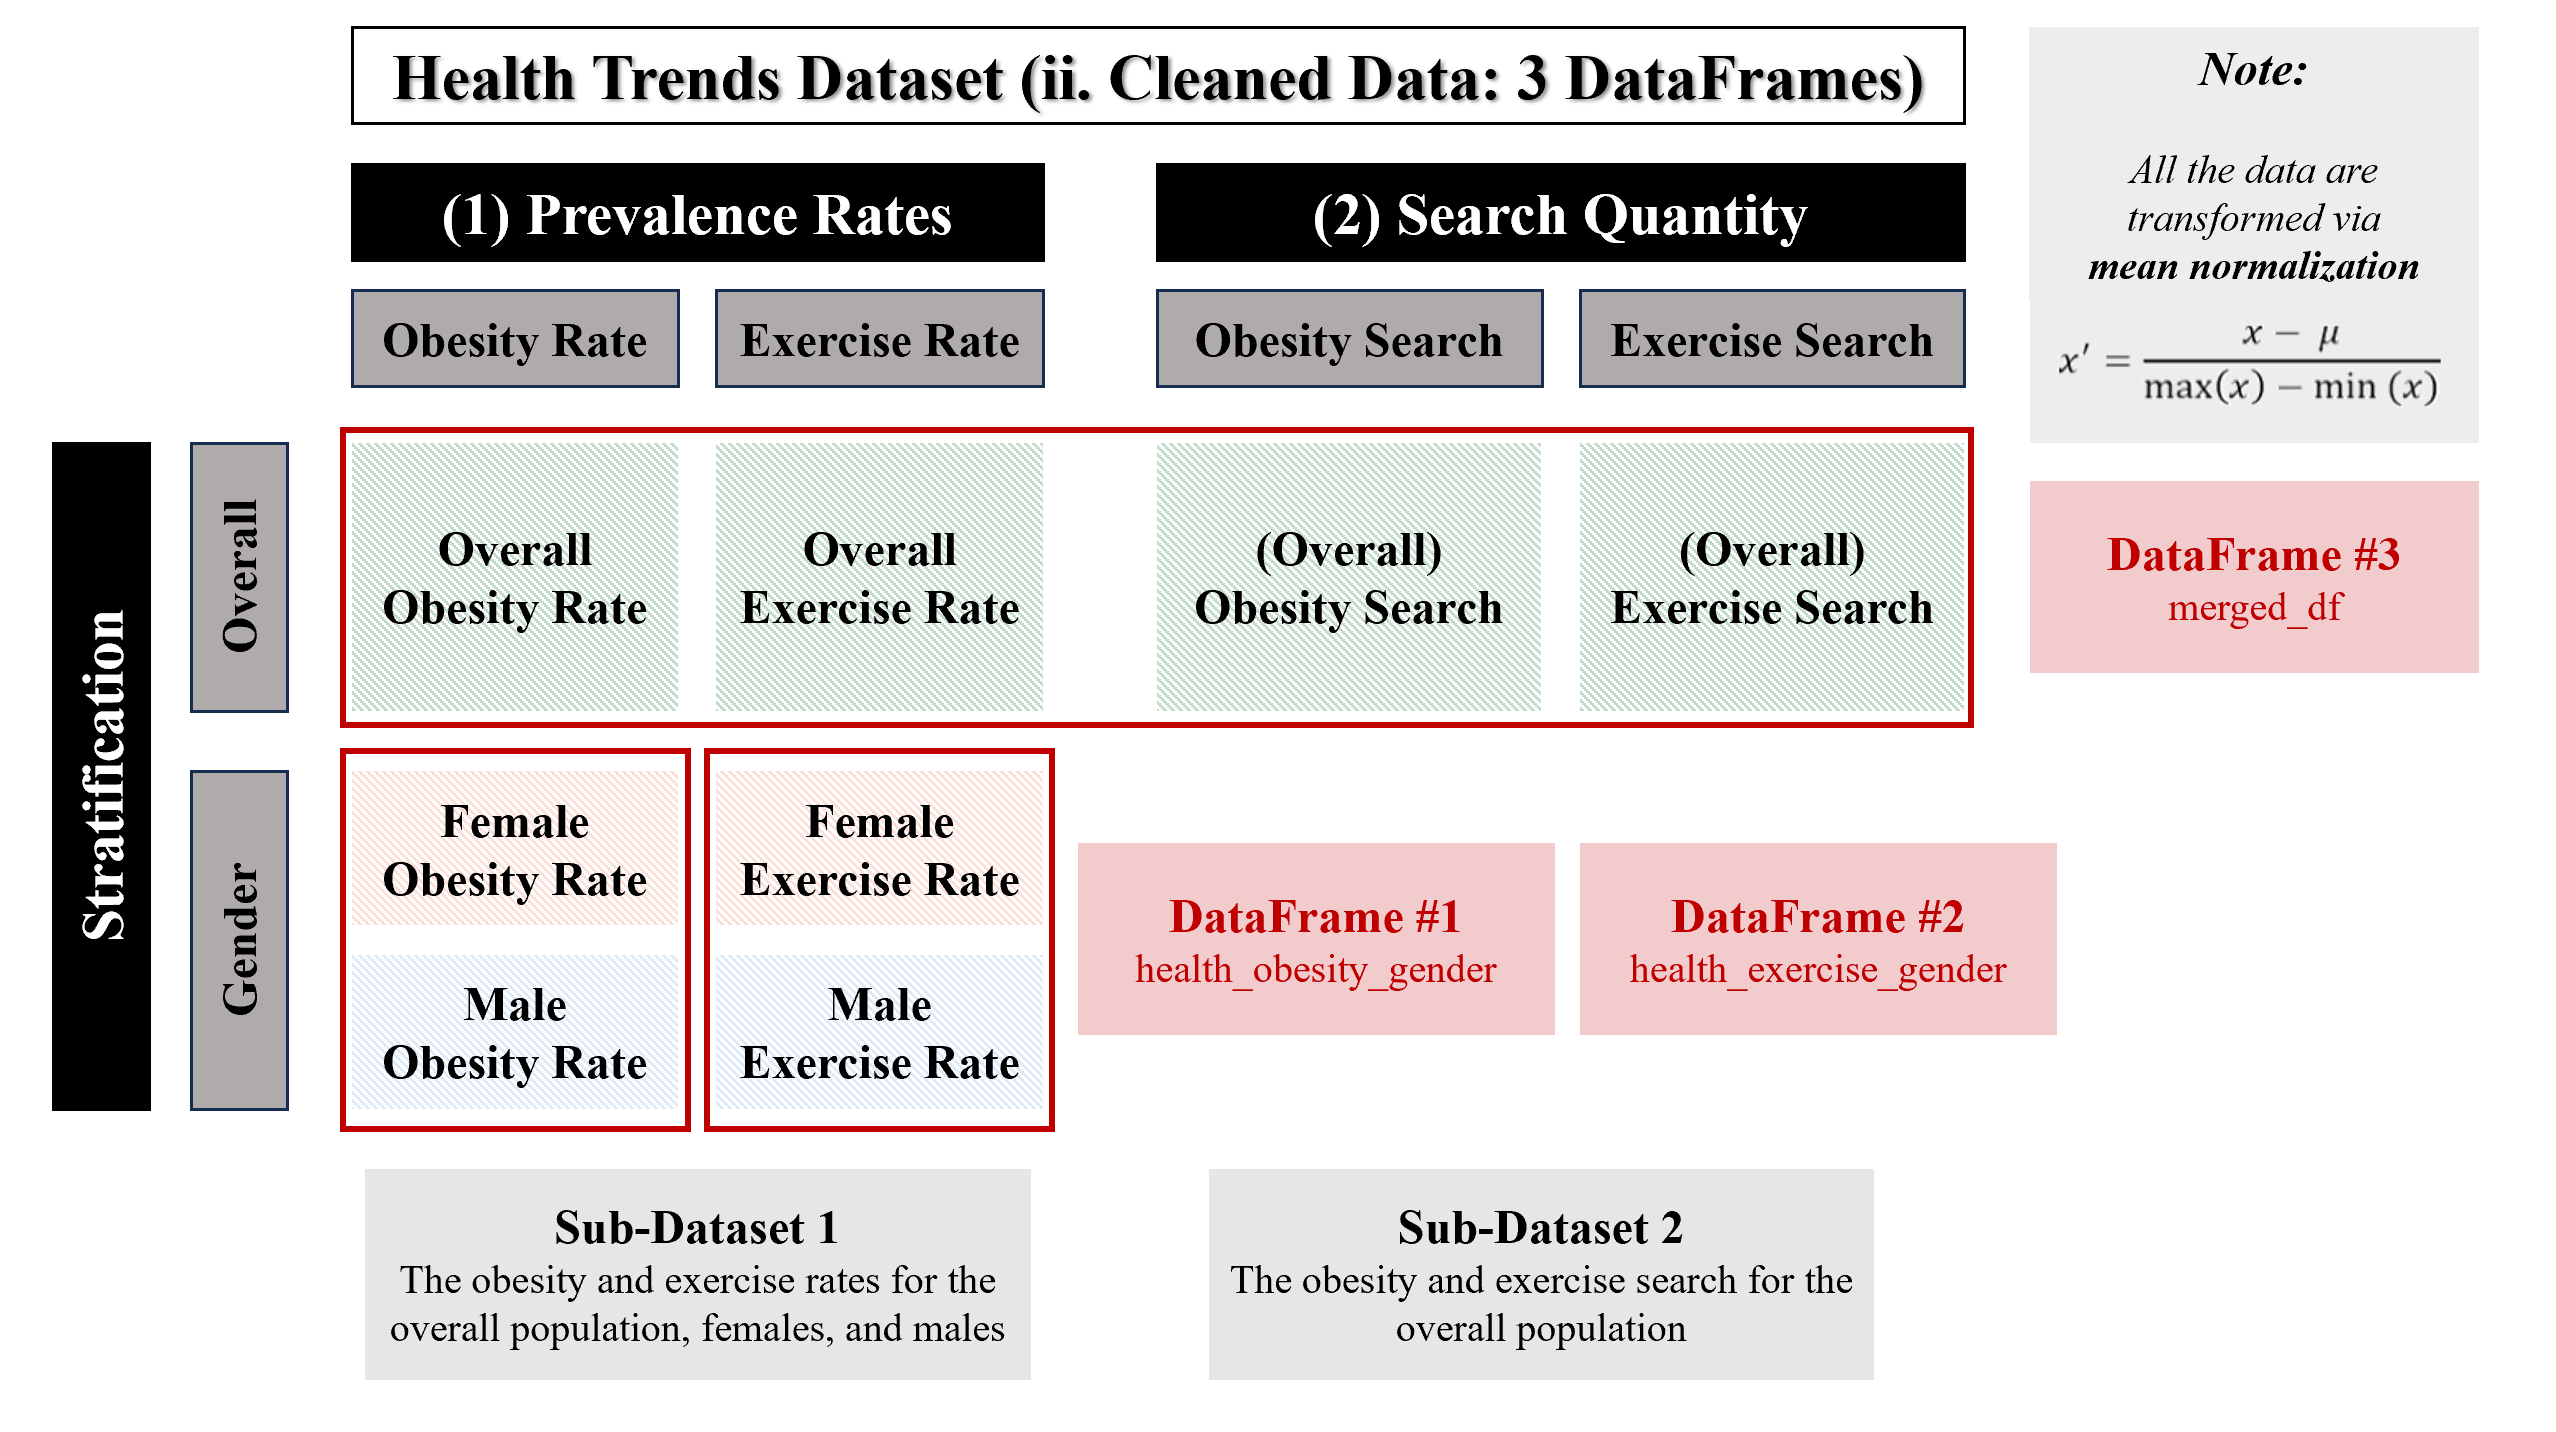

In [ ]:
# Input, read, and print the three DataFrames.
input_directory = "/content/drive/MyDrive/Applied DS Sean/milestones/milestone2/data_for_milestone2/"
health_obesity_gender = pd.read_csv(input_directory + "health_obesity_gender.csv")
health_exercise_gender = pd.read_csv(input_directory + "health_exercise_gender.csv")
merged_df = pd.read_csv(input_directory + "merged_df.csv")
print(health_obesity_gender.head(), end="\n\n")
print(health_exercise_gender.head(), end="\n\n")
print(merged_df.head())

  Stratification  Year  obesity_rate  obesity_rate_normalized
0         Female  2004     23.011271                -0.553742
1           Male  2004     23.766772                -0.467592
2         Female  2005     24.333376                -0.402982
3           Male  2005     25.129562                -0.312192
4         Female  2006     24.541332                -0.379269

  Stratification  Year  exercise_rate  exercise_rate_normalized
0         Female  2004      75.151690                 -0.112876
1           Male  2004      79.309017                  0.471289
2         Female  2005      73.806316                 -0.301920
3           Male  2005      78.075052                  0.297899
4         Female  2006      75.040607                 -0.128484

   year  obesity_rate_normalized  exercise_rate_normalized  \
0  2004                -0.552180                  0.335001   
1  2005                -0.391008                 -0.009045   
2  2006                -0.334984                  0.2860

## **1.2 Description of the Hypothesis, Key Features, & Analyses Workflow**

---



In 1.1, we have touched upon some **relevant and informative features** in the analysis. Now, in this section, we will elaborate more on them, based on our **research questions** and **hypotheses**. You can refer to the graph at the end of this section for graphical, logical intepretation.


We have **two sets** of **research questions** and **hypotheses**:

(1)   Within the Rates, between the genders:


*   **RQ:** Are there differences in the **obesity rate** between **females and males** in the United States from 2004 to 2018?
*   **Hypo:** There is a significant difference in the **obesity rate** between **females and males** in the United States from 2004 to 2018.


*   And replicate the above for the **exercise rate**.

(2)   Between the Rates and Search:

*   **RQ:** Are there correlations between the **rate and search** for **obesity** in the United States from 2004 to 2018?
*   **Hypo:** There is a significant linear correlation between the **rate and search** for **obesity** in the United States from 2004 to 2018.


*   Again, replicate the above for **exercise**.

The **first set** of RQs and Hypos will be addressed in **Section 2**.

*   We first plot a **pairplot** for a general overview. (Section 2.0)
*   Then, we deep dive into the **Obesity Rate**, examining the potential differences by **gender**. (Section 2.1)
 *   As for the **descriptive analysis**, we plot the **Obesity Rate** for **Females and Males** in the United States from 2004 to 2018, using a **lineplot** with **range error bars**.
 *   As for the **inferential analysis**, we use the **t-test** and the corresponding **p-value** to examine whether there is a **significant difference** between the **genders**.
*   We replicate the above processes for the **Exercise Rate**.(Section 2.2)

The **second set** of RQs and Hypos will be addressed in **Section 3**.


*   For the **descriptive analysis**, we plot a **scatterplot** with **linear regression**, with the **Search** on the x-axis and the **Rate** on the y-axis, for **Obesity** and **Exercise**, respectively. (Section 3.1)
*   For the inferential analysis, we use the **Pearson correlation coefficient** and the corresponding **p-value** to examine whether there is a **significant correlation** between the **Search** and **Rate**, for **Obesity** and **Exercise**, respectively. (Section 3.2)

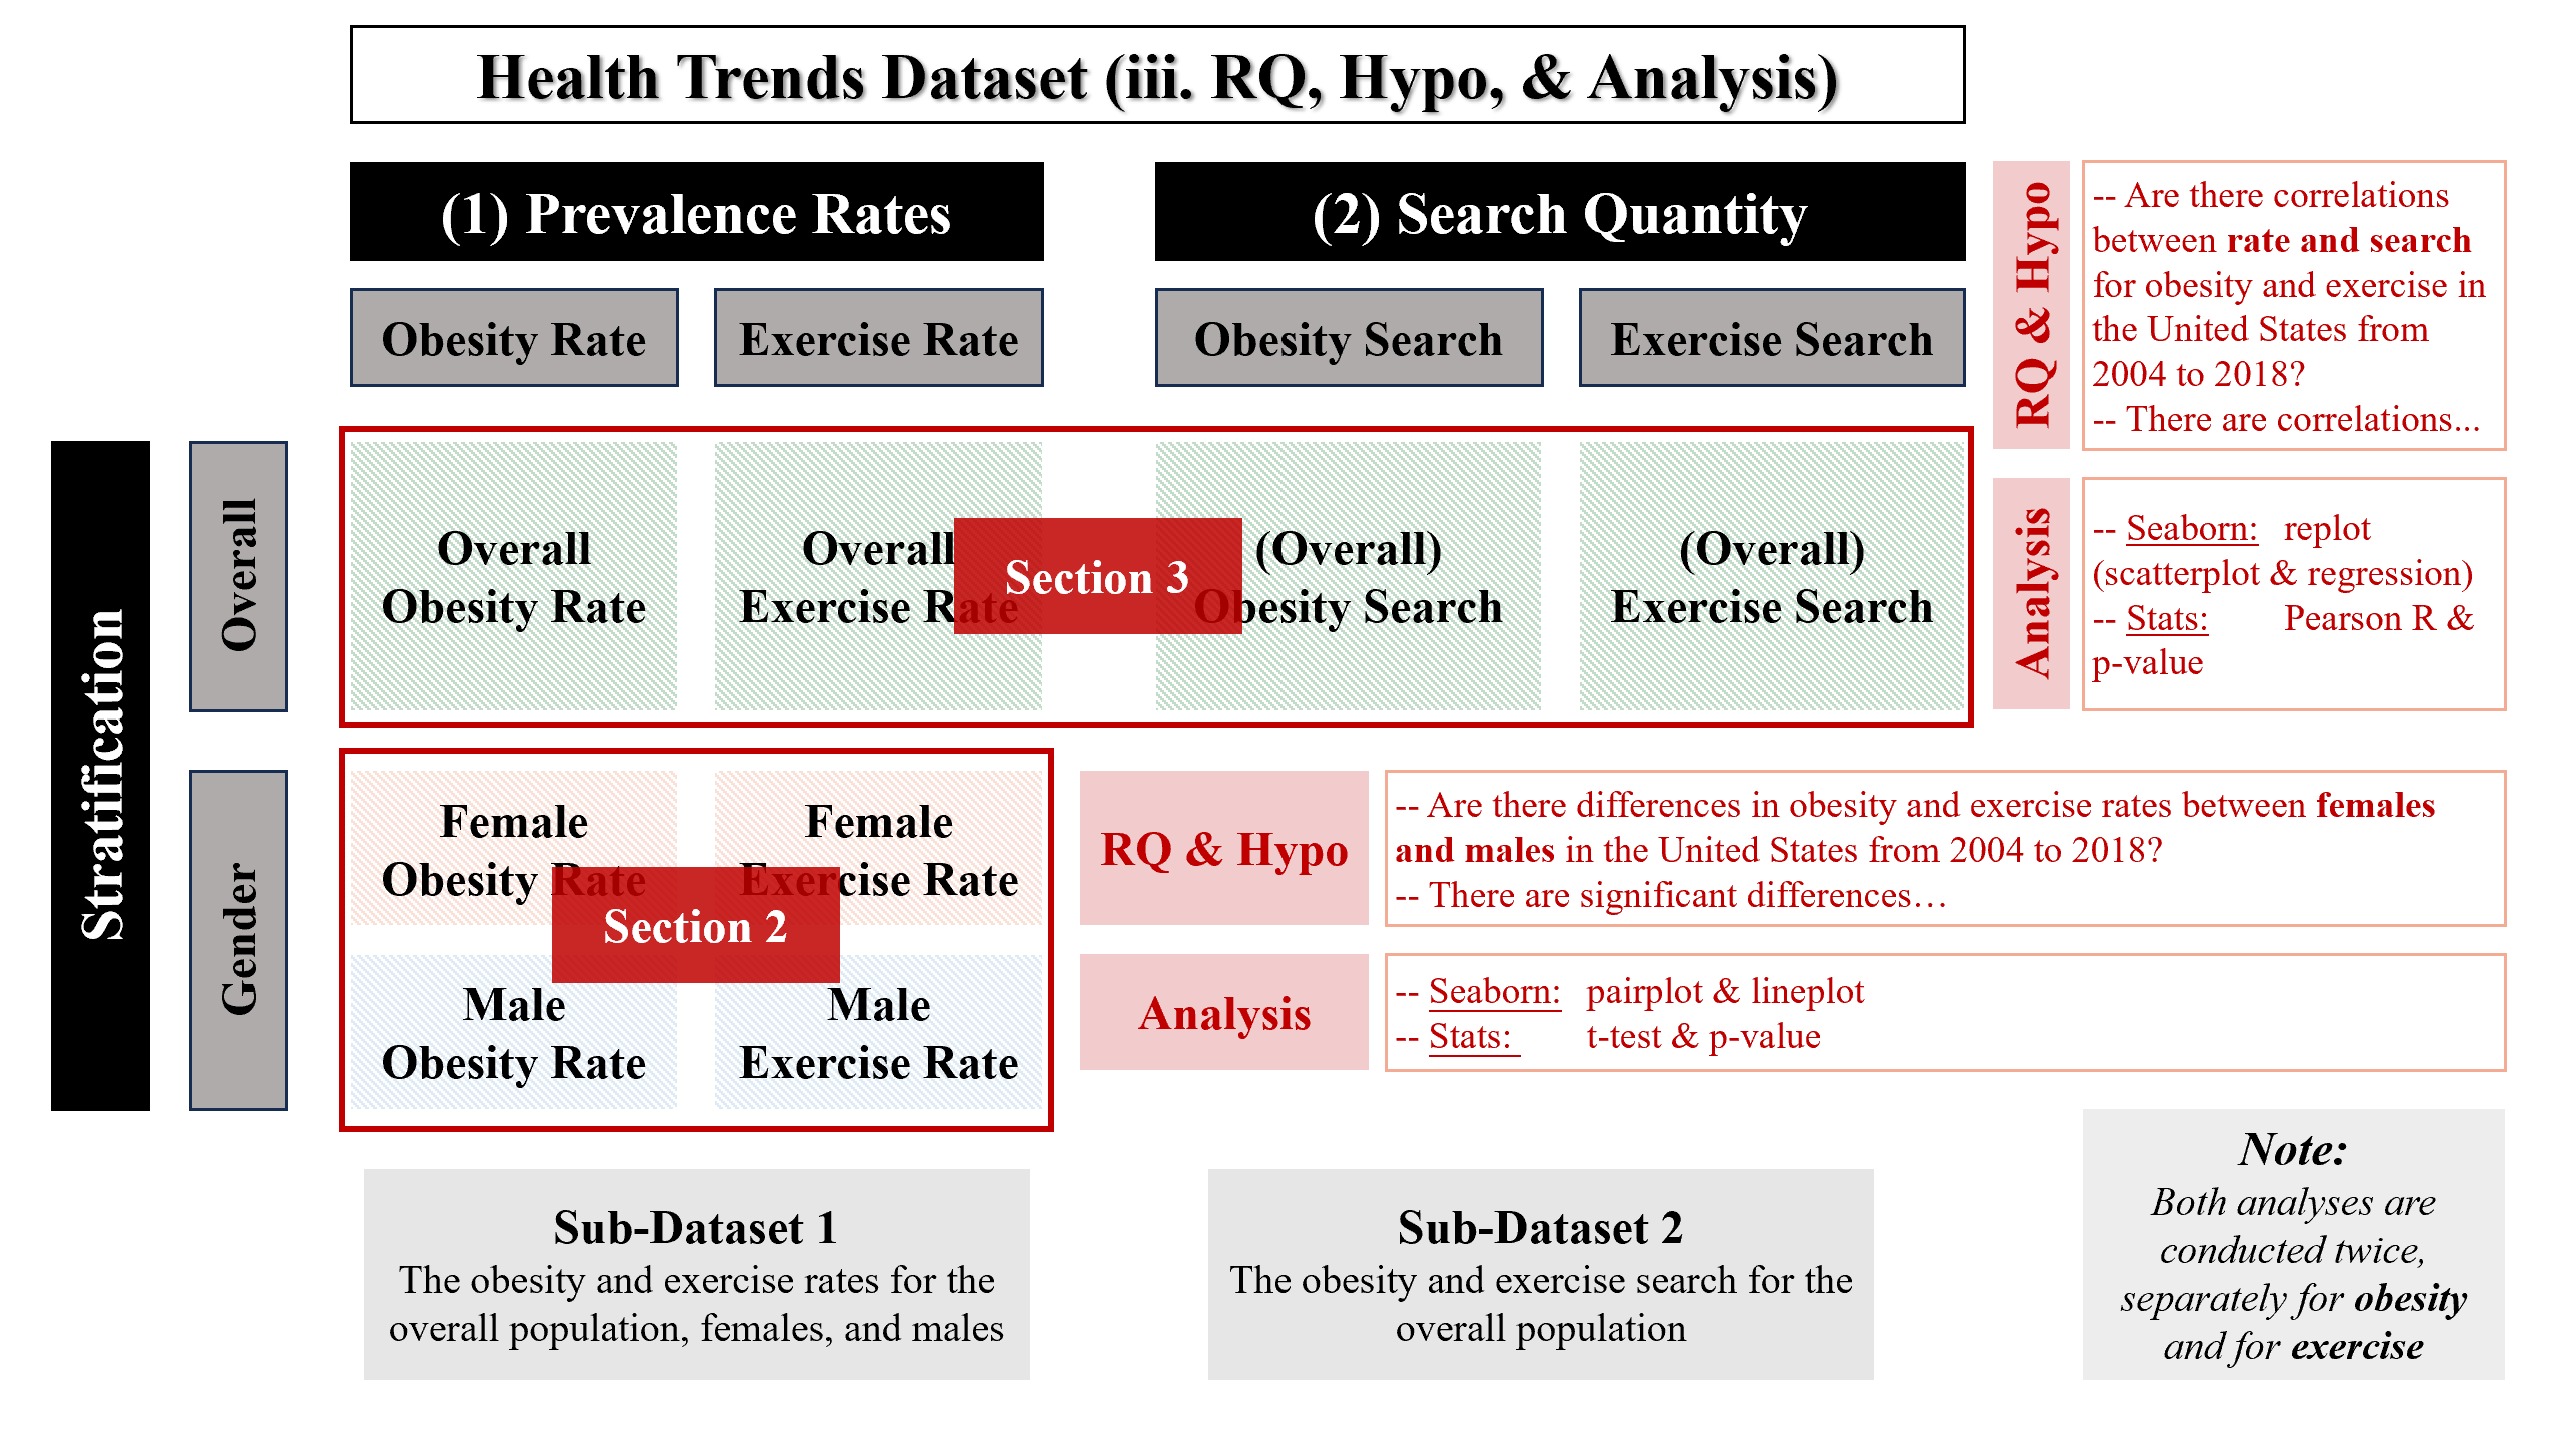

# **Section 2: Within the Rate -- Gender Differences**

Specifically, we dive into gender-specific trends in normalized obesity rate and exercise rate.

On the top of Milestone 1, we replaced the data with the one after normalized, and added **error bar** for the graph.

We aim to employ error bars as a means to effectively communicate the precision and reliability of data points within the plot, providing a visual representation of the range in which the true value of a data point is likely to reside. To achieve this, we calculated the **standard deviation** independently for obesity and exercise rates among males and females. Subsequently, we utilized **1.96 times the standard deviation** as the error bar range, aligning with the **95% confidence interval**. This value corresponds to the critical point for a two-tailed test at a **5% significance level**.

What is more, in order to better distinguish between male and female error bars, we use cap to achieve a better visualization.


## **2.0 Pairplot: A General Overview**

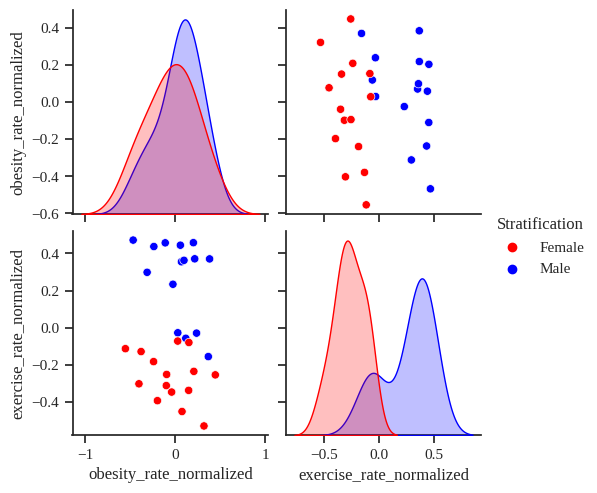

In [ ]:
# Merge the datasets
merged_data = pd.merge(health_obesity_gender, health_exercise_gender, on=['Year', 'Stratification'])

# Plotting the pairplot
sns.set(style="ticks", palette='Set2', font='Liberation Serif')
sns.pairplot(merged_data, hue='Stratification', vars=['obesity_rate_normalized', 'exercise_rate_normalized'], palette={'Female': 'red', 'Male': 'blue'})
plt.show()

**Distributions**:

The diagonal shows the distribution of both the obesity rate (left) and exercise rate (right), normalized and separated by gender (female in red, male in blue). Both distributions appear to be roughly normally distributed, although the obesity rate for females shows a slight skew to the left, and the exercise rate for females shows a slight bimodal tendency.

**Relationships**:

The scatter plot on the lower left shows the obesity rate relative to the exercise rate, and vice versa for the plot on the upper right.

There doesn't appear to be a clear linear relationship between obesity rates and exercise rates for either gender; the data points are fairly scattered. This suggests that the relationship, if any, might be weak or influenced by other factors not shown in the plot.

**Gender Differences:**

There is a visible separation between the colors, which suggests that there may be some differences between males and females in terms of obesity and exercise rates. For instance, females seem to have a slightly wider spread in obesity rates compared to males. However, the overlap in the scatter plots suggests that for any given level of exercise rate, both males and females display a range of obesity rates, and vice versa.

**Outliers:**

There do not appear to be extreme outliers in the data, as most points fall within a concentrated range.

## **2.1 Are There Differences in Obesity Rates between Females and Males?**

On the top of Milestone 1, we changed our data into the one after **normalized**, and add **error bar** in the following two graphs.

We aim to employ error bars as a means to effectively communicate the precision and reliability of data points within the plot, providing a visual representation of the range in which the true value of a data point is likely to reside. To achieve this, we calculated the **standard deviation** independently for obesity and exercise rates among males and females. Subsequently, we utilized **1.96 times the standard deviation** as the error bar range, aligning with the **95% confidence interval**. This value corresponds to the critical point for a two-tailed test at a **5% significance level**.

### **2.1.1 Descriptive Analysis**

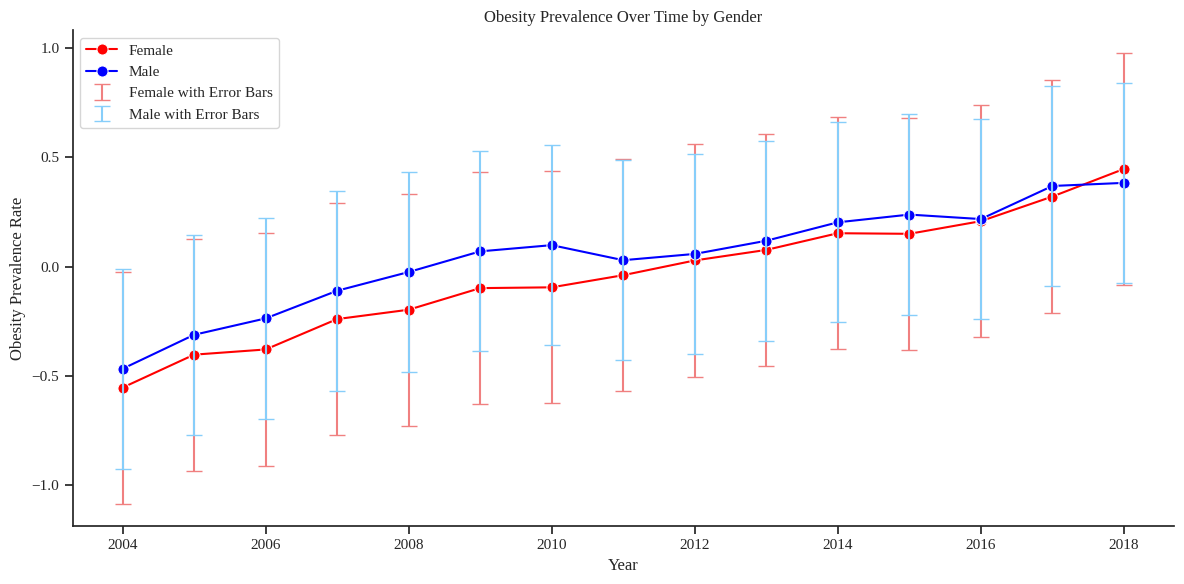

In [ ]:
# Set the style of seaborn
fm.get_font_names()
sns.set(style="ticks", palette='Set2', font='Liberation Serif')

# Create a Seaborn lineplot
plt.figure(figsize=(12, 6))

# Filter the data for males and females
health_obesity_gender_female = health_obesity_gender[health_obesity_gender['Stratification'] == 'Female']
health_obesity_gender_male = health_obesity_gender[health_obesity_gender['Stratification'] == 'Male']
# health_obesity_gender_female = health_obesity_gender.loc['Female']
# health_obesity_gender_male = health_obesity_gender.loc['Male']

# Plot obesity prevalence rate for males in blue and females in red.
sns.lineplot(x='Year', y='obesity_rate_normalized', data=health_obesity_gender_female, marker='o', markersize=8, label='Female', color='red')
sns.lineplot(x='Year', y='obesity_rate_normalized', data=health_obesity_gender_male, marker='o', markersize=8, label='Male', color='blue')

# get the obesity rate data for male and female
obesity_rate_female = health_obesity_gender_female['obesity_rate_normalized']
obesity_rate_male = health_obesity_gender_male['obesity_rate_normalized']

# Calculate the standard deviation
std_dev_female = np.std(obesity_rate_female)
std_dev_male = np.std(obesity_rate_male)

# Assuming error bars with caps based on standard deviation
plt.errorbar(x=health_obesity_gender_female['Year'], y=health_obesity_gender_female['obesity_rate_normalized'],
  yerr=1.96*std_dev_female, fmt='none', color='lightcoral', label='Female with Error Bars', capsize=6)
plt.errorbar(x=health_obesity_gender_male['Year'], y=health_obesity_gender_male['obesity_rate_normalized'],
  yerr=1.96*std_dev_male, fmt='none', color='lightskyblue', label='Male with Error Bars', capsize=6)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Obesity Prevalence Rate')
plt.title('Obesity Prevalence Over Time by Gender')
plt.legend(loc='best')
# Delete the upper and right axis
sns.despine()
plt.tight_layout()
plt.show()

The graphical representation illustrates two distinct lines: a red line denoting females and a blue line for males. Additionally, error bars are depicted, with light blue corresponding to males and pink to females.

It is evident that the obesity prevalence rates among males consistently surpass those among females, with the exception of the year 2018. Within our dataset, the year 2011 emerges as a significant point, particularly notable for the obesity rate among males. Following 2011, the obesity rate for males shows increased variability, with an overall upward trajectory. In contrast, the obesity rate among females has shown a consistent upward trend. What is more, there was a slight decline in the obesity rate among males from 2010 to 2011, after which the disparity between male and female rates has gradually declined.

### **2.1.2 Inferential Analysis**

In [ ]:
#t test obesity rate (male vs. female)

#extract obesity rates for males and females
obesity_rate_male = health_obesity_gender[health_obesity_gender['Stratification'] == 'Male']['obesity_rate_normalized']
obesity_rate_female = health_obesity_gender[health_obesity_gender['Stratification'] == 'Female']['obesity_rate_normalized']

#perform t-test
t_statistic, p_value = stats.ttest_ind(obesity_rate_male, obesity_rate_female)

print(f"T-Statistic: {t_statistic}, P-Value: {p_value}")

T-Statistic: 0.874857218682144, P-Value: 0.38909444762479184


The T-Statistic of `0.875` suggests a small difference between the male and female obesity rates, and the p-value of `0.389` means there's a `38.9%` chance of seeing a difference as large as we observed (or larger) if there were actually no difference between male and female obesity rates.

Since the p-value is greater than the significance threshold of `0.05`, we would not reject the null hypothesis. In other words, the evidence is not strong enough to conclude that there is a statistically significant difference in obesity rates between males and females in your dataset.

## **2.2 Are There Differences in Exercise Rates between Females and Males?**

### **2.2.1 Descriptive Analysis**

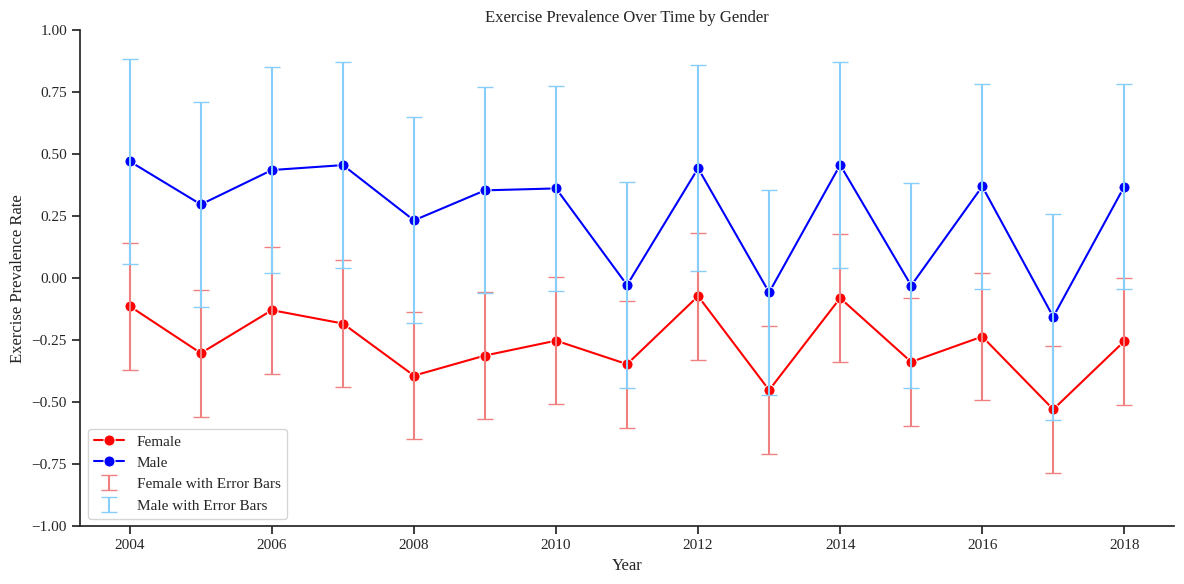

In [ ]:
# Set the style of seaborn
fm.get_font_names()
sns.set(style="ticks", palette='Set2', font='Liberation Serif')

# Create a Seaborn lineplot
plt.figure(figsize=(12, 6))

# Filter the data for males and females
health_exercise_gender_female = health_exercise_gender[health_exercise_gender['Stratification'] == 'Female']
health_exercise_gender_male = health_exercise_gender[health_exercise_gender['Stratification'] == 'Male']
# health_exercise_gender_female = health_exercise_gender.loc['Female']
# health_exercise_gender_male = health_exercise_gender.loc['Male']

# Plot exercise prevalence rate for males in blue and females in red.
sns.lineplot(x='Year', y='exercise_rate_normalized', data=health_exercise_gender_female, marker='o', markersize=8, label='Female', color='red')
sns.lineplot(x='Year', y='exercise_rate_normalized', data=health_exercise_gender_male, marker='o', markersize=8, label='Male', color='blue')

# Get obesity rate data for male and female
exercise_rate_female = health_exercise_gender_female['exercise_rate_normalized']
exercise_rate_male = health_exercise_gender_male['exercise_rate_normalized']

# Calculate the standard deviation
std_dev_female = np.std(exercise_rate_female)
std_dev_male = np.std(exercise_rate_male)

# Assuming error bars with caps based on standard deviation
plt.errorbar(x=health_exercise_gender_female['Year'], y=health_exercise_gender_female['exercise_rate_normalized'],
  yerr=1.96*std_dev_female, fmt='none', color='lightcoral', label='Female with Error Bars', capsize=6)
plt.errorbar(x=health_exercise_gender_male['Year'], y=health_exercise_gender_male['exercise_rate_normalized'],
  yerr=1.96*std_dev_male, fmt='none', color='lightskyblue', label='Male with Error Bars', capsize=6)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Exercise Prevalence Rate')
plt.title('Exercise Prevalence Over Time by Gender')
plt.legend(loc='best')
plt.ylim(-1, 1)
# Delete the upper and right axis
sns.despine()
plt.tight_layout()
plt.show()

Similarly, the trends within gender categories and overall trends demonstrate a remarkable consistency, with obesity rates consistently higher for males in comparison to females. This overarching pattern underscores the need for a nuanced examination of factors influencing the disparities observed, as it suggests a persistent gender-based distinction in obesity prevalence rates.


### **2.2.2 Inferential Analysis**

In [ ]:
#t test exercise rate (male vs. female)
from scipy import stats

#extract exercise rates for males and females
exercise_rate_male = health_exercise_gender[health_exercise_gender['Stratification'] == 'Male']['exercise_rate_normalized']
exercise_rate_female = health_exercise_gender[health_exercise_gender['Stratification'] == 'Female']['exercise_rate_normalized']

#perform t-test
t_statistic, p_value = stats.ttest_ind(exercise_rate_male, exercise_rate_female)

print(f"T-Statistic: {t_statistic}, P-Value: {p_value}")

T-Statistic: 7.989012615998675, P-Value: 1.0620026887905697e-08


A higher absolute value of the t-statistic indicates a greater difference between the two groups. In this case case, a t-statistic of `7.989` is relatively large, which suggests a substantial difference between the exercise rates of males and females in your dataset.

As for the p value, `1.06^(10-8)`, indicates that the observed difference in exercise rates is highly unlikely to have occurred by chance. The p-value is much smaller than the threshold `0.05`, meaning that the difference in exercise rates between males and females in your sample is statistically significant.


## **2.3 Obesity Rates vs. Exercise Rates: A Brief Exploration**

In [ ]:
#extract exercise and obesity rates for males and females
exercise_rate = merged_df['exercise_rate_normalized']
obesity_rate = merged_df['obesity_rate_normalized']

#Pearson correlation coefficient
pearson_corr, p_value_pearson = pearsonr(exercise_rate, obesity_rate)

print(f"Pearson correlation: {pearson_corr}, P-value: {p_value_pearson}")

Pearson correlation: -0.3951513464327558, P-value: 0.14490667813134953


The Pearson correlation coefficient of approximately `-0.395` suggests a moderate negative linear relationship between the obesity and exercise rates, this could mean that higher exercise rates are moderately associated with lower obesity rates, or vice versa.

However, the p-value of approximately `0.145`, which is greater than the common threshold of `0.05`, indicates that this correlation is not statistically significant. In other words, there is not enough evidence to conclude that there is a statistically significant linear relationship between the two variables in the population from which our sample was drawn.

# **Section 3: Between the Rate and Search -- Are There Correlations, for Both Obesity and Exercise?**

## **3.1 Descriptive Analysis**



To check whether there's a significant correlation between the rate and search quantity, we use the **pearson method** to calculate the correlation coefficient and p values.

Before diving into inferential analysis, we first see **2 regplots** to get an intuitive insight of the relationship between rate of exercise/obesity and corresponding search quantity.

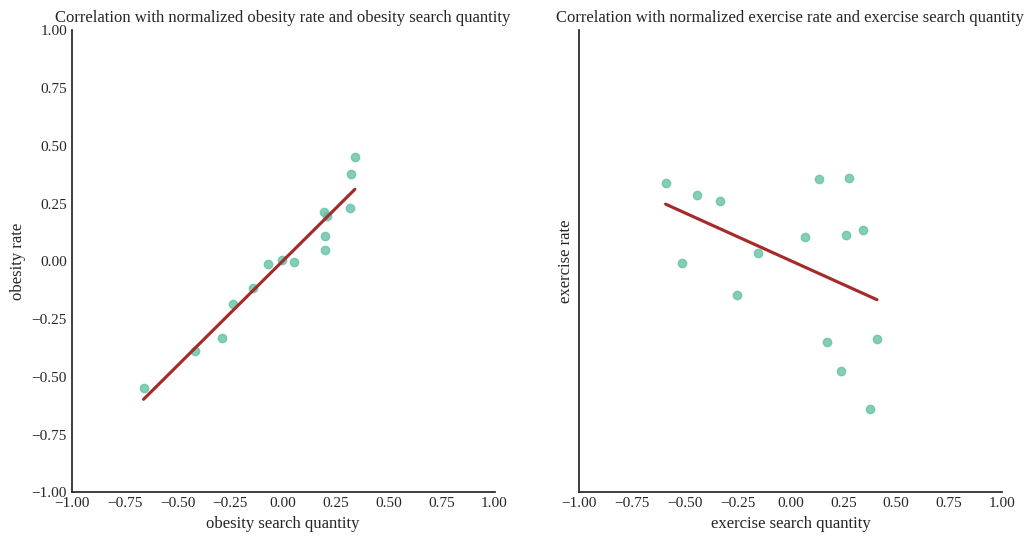

In [ ]:
# Set the style of seaborn
sns.set(style="ticks", palette='Set2', font='Liberation Serif')

# Create a Seaborn subplots to compare difference in exercise and obesity
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.regplot(x='exercise_search_normalized', y='exercise_rate_normalized', data=merged_df, ax=axes[1],line_kws={"color": "brown"},ci=None)
sns.regplot(x='obesity_search_normalized', y='obesity_rate_normalized', data=merged_df, ax=axes[0],line_kws={"color": "brown"},ci=None)
# set up labels and title for exercise plot
axes[1].set_title("Correlation with normalized exercise rate and exercise search quantity",fontsize=12)
axes[1].set_xlim([-1, 1])
axes[1].set_ylim([-1, 1])
axes[1].set_xlabel("exercise search quantity",fontsize=12)
axes[1].set_ylabel("exercise rate",fontsize=12)
axes[1].tick_params(axis='both', which='both', length=0)
# set up labels and title for obesity plot
axes[0].set_title("Correlation with normalized obesity rate and obesity search quantity",fontsize=12)
axes[0].set_xlim([-1, 1])
axes[0].set_ylim([-1, 1])
axes[0].set_xlabel("obesity search quantity",fontsize=12)
axes[0].set_ylabel("obesity rate",fontsize=12)
axes[1].set_yticks([])
axes[0].tick_params(axis='both', which='both', length=0)
# delete the right and top frame of both plots
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

Based on the scatter points and regression line, we discover that points in exercise rate and exercise search quantity seems to be more scattered around the regression line. While the points in obesity rate and obesity exercise search quantity seems to be gathered around the line, which appears to indicate a strong correlation.

Then we will use the pearson method to statistically test the correlation.

## **3.2 Inferential Analysis**

In [ ]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and the p-value.
obesity_correlation, obesity_p_value = pearsonr(merged_df["obesity_rate_normalized"], merged_df["obesity_search_normalized"])
exercise_correlation, exercise_p_value = pearsonr(merged_df["exercise_rate_normalized"], merged_df["exercise_search_normalized"])

# Print the result of the correlation, with coefficient and p-value.
print("For obesity:")
print("Correlation coefficient:", obesity_correlation)
print("P-value:", obesity_p_value)
print()
print("For exercise:")
print("Correlation coefficient:", exercise_correlation)
print("P-value:", exercise_p_value)

For obesity:
Correlation coefficient: 0.9687156603600564
P-value: 3.0224607041820628e-09

For exercise:
Correlation coefficient: -0.44639231148562336
P-value: 0.09532335238179272


In [ ]:
alpha = 0.05  # A commonly-used p-value threshold

p_value_dict={"obesity": obesity_p_value, "exercise":exercise_p_value}

# Display the result of the significance testing.
for k,v in p_value_dict.items():
  if v < alpha:
    print(f"The difference between pairs for {k} is statistically significant, p={v:.4e}")
  else:
    print(f"The difference between pairs for {k} is not statistically significant, p={v:.4e}")

The difference between pairs for obesity is statistically significant, p=3.0225e-09
The difference between pairs for exercise is not statistically significant, p=9.5323e-02


## **Conclusion for section 3**

The Pearson correlation coefficient of **obesity rate and search quantity** is approximately `0.968` suggests a moderate positive linear relationship between the obesity rates and search quantity, this could mean that higher obesity rates are moderately associated with higher search, or vice versa.


And the p values is extremely small, less than `0.05`, which means the difference between pairs for obesity rate is statistically significant.

The Pearson correlation coefficient of **exercise rate and search quantity** is approximately `-0.446` suggests a moderate negative linear relationship between the exercise rates and search quantity, this could mean that higher exercise rates are moderately associated with lower search, or vice versa.

However, the p-value is approximately `0.095`, which is greater than the common threshold of `0.05`, indicates that this correlation is not statistically significant. In other words, there is not enough evidence to conclude that there is a statistically significant linear relationship between the two variables in the population from which our sample was drawn.





# **Appendix: Code for Data Cleaning**

Below are the condensed version of the data cleaning code, synthesized from Milestone 1, for your reference.

In [ ]:
# Obtain the prevalence rates (for overall, male and female; of obesity and exercise) from the Health Statistics dataset,
health_df = pd.read_csv("/content/drive/MyDrive/Applied DS Sean/milestones/preprocessed_data/health_stats.csv")
health_df["Data_Value"] = pd.to_numeric(health_df["Data_Value"], errors="coerce")
health_df["Year"] = health_df["Year"].astype(int)
# Drop unnecessary rows and columns.
col_to_drop = ["Unnamed: 0", "ID", "LocationAbbr", "Low_Confidence_Limit", "High_Confidence_Limit"]
health_df.drop(col_to_drop, axis=1, inplace=True)
row_to_drop = ["All States, DC and Territories (median) **", "All States and DC (median) **"]
condition = ~health_df["LocationDesc"].isin(row_to_drop)
health_df = health_df[condition]
# Deal with missing data by dropping the rows.
nan_rows = health_df[health_df.isna().any(axis=1)].sort_values(by=["LocationDesc", "Stratification", "Year"])
health_df.dropna(inplace=True)
def weighted_average(group):
  d = group["Data_Value"]
  w = group["Sample_Size"]
  return (d * w).sum() / w.sum()
health_df = health_df.groupby(["variable", "Year", "Stratification", "StratificationType"]).apply(weighted_average).reset_index(name="weighted_average")
# Filter rows to create new independent dataframes, for obesity and exercise.
# Then, rename the "weighted_average" into prevalence rate, remove the now-redundant "variable" column, and reset the index.
health_obesity = health_df[health_df["variable"] == "obesity"].copy()
health_exercise = health_df[health_df["variable"] == "exercise"].copy()
health_obesity.rename(columns={"weighted_average": "obesity_rate"}, inplace=True)
health_exercise.rename(columns={"weighted_average": "exercise_rate"}, inplace=True)
health_obesity.drop(columns=["variable"], inplace=True)
health_exercise.drop(columns=["variable"], inplace=True)
health_obesity.reset_index(drop=True, inplace=True)
health_exercise.reset_index(drop=True, inplace=True)
# Divide the datasets by stratification (overall/gender), for both obesity and exercise.
# Filter by "StratificationType", remove the now-redundant "StratificationType" column, and set "Stratification" as the index.
health_obesity_gender = health_obesity[health_obesity["StratificationType"] == "Gender"].copy()
health_obesity_overall = health_obesity[health_obesity["StratificationType"] == "Overall"].copy()
health_obesity_gender.drop(columns=["StratificationType"], inplace=True)
health_obesity_overall.drop(columns=["StratificationType"], inplace=True)
health_obesity_gender.set_index("Stratification", inplace=True)
health_obesity_overall.set_index("Stratification", inplace=True)
health_exercise_gender = health_exercise[health_exercise["StratificationType"] == "Gender"].copy()
health_exercise_overall = health_exercise[health_exercise["StratificationType"] == "Overall"].copy()
health_exercise_gender.drop(columns=["StratificationType"], inplace=True)
health_exercise_overall.drop(columns=["StratificationType"], inplace=True)
health_exercise_gender.set_index("Stratification", inplace=True)
health_exercise_overall.set_index("Stratification", inplace=True)
# Sort by "Year".
order = ["Year", "Stratification"]
health_obesity_gender.sort_values(by=order, inplace=True)
health_obesity_overall.sort_values(by=order, inplace=True)
health_exercise_gender.sort_values(by=order, inplace=True)
health_exercise_overall.sort_values(by=order, inplace=True)

In [ ]:
# Obtain the search quantity (overall; of obesity and exercise) from the Spatial Trends dataset.
spatial_df = pd.read_csv("/content/drive/MyDrive/Applied DS Sean/milestones/preprocessed_data/spatial_trends.csv")
# Select keywords to represent exercise and obesity, respectively.
obesity_list = ["calories", "cholesterol", "diet", "dresses plus size", "food delivery near me", "how to lose weight", "obese", "obesity", "sugar level", "symptoms of diabetes", "symptoms of high blood sugar", "weighing", "weight loss"]
exercise_list = ["aerobic exercise", "best workout", "bodybuilding", "exercise", "exercises", "fitness gym", "fitness", "gym near me", "gym", "how to exercise", "jogging", "workout", "yoga"]
spatial_obesity = spatial_df.iloc[:, 1:3].join(spatial_df[obesity_list])
spatial_exercise = spatial_df.iloc[:, 1:3].join(spatial_df[exercise_list])
# For a given year (2004-2018), for obesity/exercise， respectively, add search appearances FOR ALL SELECTED KEYWORDS and ACROSS ALL GIVEN LOCATIONS.
def sum_spatial(df, header):
  sum_col_df = df.groupby("year")[df.columns[2:]].sum() # Sum within a column
  sum_row_df = sum_col_df.groupby("year").sum() # Sum across columns
  sum_row_df[header] = sum_row_df.sum(axis=1)
  sum_row_df = sum_row_df[header] # Keep only the sum
  result_df = sum_row_df.reset_index()
  return result_df
spatial_obesity = sum_spatial(spatial_obesity, "obesity_search")
spatial_exercise = sum_spatial(spatial_exercise, "exercise_search")
# Merge the prevalence rate (from Health Statistics) and the search quantity (from Spatial Trends) on the years.
health_obesity_df = health_obesity_overall.reset_index()
health_obesity_df.drop("Stratification", axis=1, inplace=True)
health_obesity_df.rename(columns=str.lower, inplace=True)
health_exercise_df = health_exercise_overall.reset_index()
health_exercise_df.drop("Stratification", axis=1, inplace=True)
health_exercise_df.rename(columns=str.lower, inplace=True)
merged_df = health_obesity_df.merge(health_exercise_df, on="year").merge(spatial_obesity, on="year").merge(spatial_exercise, on="year")
merged_df[["obesity_search", "exercise_search"]] = merged_df[["obesity_search", "exercise_search"]].astype(int)
merged_df.set_index("year", inplace=True)

In [ ]:
# Normalize the data by using mean normalization.
def normalize_column(column):
  return (column - column.mean()) / (column.max()-column.min())
health_obesity_gender["obesity_rate_normalized"] = normalize_column(health_obesity_gender["obesity_rate"])
health_exercise_gender["exercise_rate_normalized"] = normalize_column(health_exercise_gender["exercise_rate"])
merged_df = merged_df.apply(normalize_column)
merged_df.columns = [col + "_normalized" for col in merged_df.columns]
# Export the cleaned data files into csv files.
output_directory = "/content/drive/MyDrive/Applied DS Sean/milestones/milestone2/data_for_milestone2/"
# health_obesity_gender.to_csv(output_directory + "health_obesity_gender.csv")
# health_exercise_gender.to_csv(output_directory + "health_exercise_gender.csv")
# merged_df.to_csv(output_directory + "merged_df.csv")